Data preview:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0  

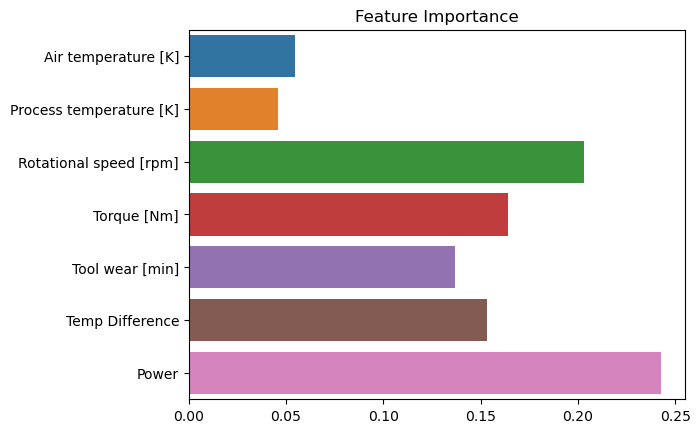

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = "C:/Users/kavya/Downloads/ai4i+2020+predictive+maintenance+dataset (1)/ai4i2020.csv"  #file path
data = pd.read_csv(file_path)
print("Data preview:")# Print the first few rows to inspect the data
print(data.head())

# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Encode categorical variables (if Product ID is categorical)
data['Product ID'] = data['Product ID'].astype('category').cat.codes

# Feature engineering: Create new features
data['Temp Difference'] = data['Process temperature [K]'] - data['Air temperature [K]']
data['Power'] = data['Torque [Nm]'] * data['Rotational speed [rpm]']

# Define features and target
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Temp Difference', 'Power']]
y = data['Machine failure']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance (this must come after model fitting)
importances = model.feature_importances_

# Plot feature importance
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance")
plt.show()
